In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
#loading the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

# Display basic information about the dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

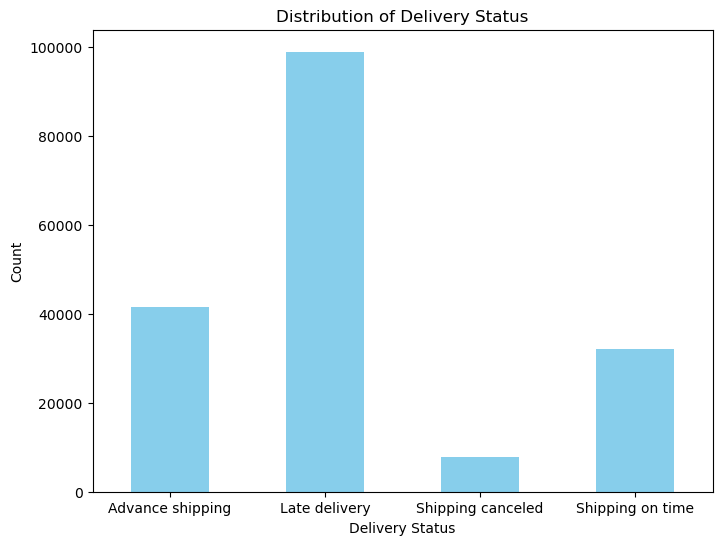

In [3]:
# Plot the distribution of Delivery_Status
plt.figure(figsize=(8, 6))
df['Delivery Status'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

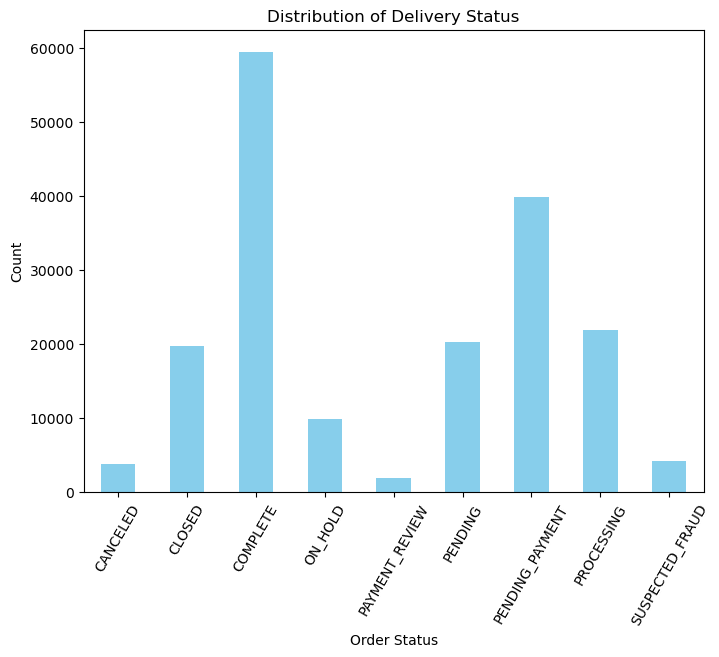

In [4]:
# Plot the distribution of Delivery_Status
plt.figure(figsize=(8, 6))
df['Order Status'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Delivery Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

In [5]:
# Drop irrelevant columns
df = df[['Late_delivery_risk', 'Customer State', 'Customer Street', 'Customer Zipcode',
         'Order City', 'Order Country', 'Order Region', 'Order State', 'Order Status']]

# Display summary statistics
print(df.describe())

# Display missing values
print("Missing values:")
print(df.isnull().sum())

# Display unique values for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values for {col}:\n{df[col].unique()}")



       Late_delivery_risk  Customer Zipcode
count       180519.000000     180516.000000
mean             0.548291      35921.126914
std              0.497664      37542.461122
min              0.000000        603.000000
25%              0.000000        725.000000
50%              1.000000      19380.000000
75%              1.000000      78207.000000
max              1.000000      99205.000000
Missing values:
Late_delivery_risk    0
Customer State        0
Customer Street       0
Customer Zipcode      3
Order City            0
Order Country         0
Order Region          0
Order State           0
Order Status          0
dtype: int64

Unique values for Customer State:
['PR' 'CA' 'NY' 'FL' 'MA' 'IL' 'MT' 'PA' 'MI' 'TX' 'DE' 'GA' 'MD' 'OH'
 'HI' 'NJ' 'WI' 'AZ' 'CO' 'MN' 'NC' 'NM' 'OR' 'SC' 'VA' 'UT' 'WA' 'KY'
 'WV' 'RI' 'CT' 'LA' 'TN' 'DC' 'ND' 'MO' 'IN' 'ID' 'NV' 'KS' 'AR' 'OK'
 'AL' 'IA' '95758' '91732']

Unique values for Customer Street:
['5365 Noble Nectar Island' '2679 Rustic Loop' 

C:\Users\14317\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\14317\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\14317\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


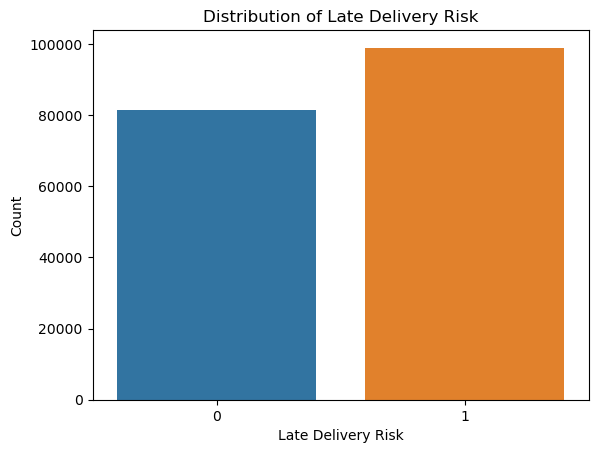

Late Delivery Risk Distribution:
Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

Percentage Distribution:
Late_delivery_risk
1    54.829132
0    45.170868
Name: count, dtype: float64


In [6]:
sns.countplot(x='Late_delivery_risk', data=df)
plt.title('Distribution of Late Delivery Risk')
plt.xlabel('Late Delivery Risk')
plt.ylabel('Count')
plt.show()

# Data analysis
late_delivery_counts = df['Late_delivery_risk'].value_counts()

print("Late Delivery Risk Distribution:")
print(late_delivery_counts)

# Calculate percentage distribution
percentage_distribution = late_delivery_counts / len(df) * 100
print("\nPercentage Distribution:")
print(percentage_distribution)

In [7]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Order Status'], drop_first=True)

# Fill missing values
df['Customer Zipcode'].fillna(df['Customer Zipcode'].median(), inplace=True)

# Separate predictors (X) and target variable (y)
X = df.drop('Late_delivery_risk', axis=1)
y = df['Late_delivery_risk']



In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create preprocessor to handle both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])



In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Create an MLP Classifier with multiple hidden layer sizes
for hidden_size in range(2, 8):
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(hidden_size,),  # You can adjust the number of neurons in each hidden layer
                                   activation='relu',  
                                   solver='adam',
                                   max_iter=50,
                                   random_state=42)

    # Create a pipeline with the preprocessor and MLP classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', mlp_classifier)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    print(f"\nResults for hidden_layer_sizes={hidden_size}:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Accuracy
    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
    print("Accuracy:", accuracy)

C:\Users\14317\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



Results for hidden_layer_sizes=2:
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66     16307
           1       0.72      0.75      0.74     19797

    accuracy                           0.70     36104
   macro avg       0.70      0.70      0.70     36104
weighted avg       0.70      0.70      0.70     36104

Confusion Matrix:
 [[10482  5825]
 [ 4901 14896]]
Accuracy: 0.7029138045645912


C:\Users\14317\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



Results for hidden_layer_sizes=3:
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76     16307
           1       0.79      0.84      0.81     19797

    accuracy                           0.79     36104
   macro avg       0.79      0.79      0.79     36104
weighted avg       0.79      0.79      0.79     36104

Confusion Matrix:
 [[11981  4326]
 [ 3249 16548]]
Accuracy: 0.7901894526922225


C:\Users\14317\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



Results for hidden_layer_sizes=4:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77     16307
           1       0.80      0.82      0.81     19797

    accuracy                           0.79     36104
   macro avg       0.79      0.79      0.79     36104
weighted avg       0.79      0.79      0.79     36104

Confusion Matrix:
 [[12294  4013]
 [ 3532 16265]]
Accuracy: 0.7910203855528474


C:\Users\14317\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



Results for hidden_layer_sizes=5:
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79     16307
           1       0.81      0.86      0.84     19797

    accuracy                           0.82     36104
   macro avg       0.82      0.81      0.81     36104
weighted avg       0.82      0.82      0.81     36104

Confusion Matrix:
 [[12324  3983]
 [ 2694 17103]]
Accuracy: 0.8150620429869266


C:\Users\14317\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



Results for hidden_layer_sizes=6:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     16307
           1       0.86      0.89      0.88     19797

    accuracy                           0.86     36104
   macro avg       0.86      0.86      0.86     36104
weighted avg       0.86      0.86      0.86     36104

Confusion Matrix:
 [[13412  2895]
 [ 2143 17654]]
Accuracy: 0.8604586749390649

Results for hidden_layer_sizes=7:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     16307
           1       0.89      0.89      0.89     19797

    accuracy                           0.88     36104
   macro avg       0.88      0.88      0.88     36104
weighted avg       0.88      0.88      0.88     36104

Confusion Matrix:
 [[14059  2248]
 [ 2138 17659]]
Accuracy: 0.8785176157766452


C:\Users\14317\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:

# Create an MLP Classifier with varying hidden layer sizes
for num_hidden_layers in range(1, 6):
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(8,) * num_hidden_layers,  # Use 8 neurons in each hidden layer
                                   activation='relu',  
                                   solver='adam',
                                   max_iter=50,
                                   random_state=42)

    # Create a pipeline with the preprocessor and MLP classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', mlp_classifier)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    print(f"\nResults for {num_hidden_layers} hidden layer(s):")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Accuracy
    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
    print("Accuracy:", accuracy)

C:\Users\14317\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



Results for 1 hidden layer(s):
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     16307
           1       0.91      0.94      0.92     19797

    accuracy                           0.92     36104
   macro avg       0.92      0.91      0.91     36104
weighted avg       0.92      0.92      0.92     36104

Confusion Matrix:
 [[14549  1758]
 [ 1280 18517]]
Accuracy: 0.9158541989807224


C:\Users\14317\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



Results for 2 hidden layer(s):
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     16307
           1       0.91      0.94      0.92     19797

    accuracy                           0.92     36104
   macro avg       0.92      0.91      0.91     36104
weighted avg       0.92      0.92      0.91     36104

Confusion Matrix:
 [[14401  1906]
 [ 1161 18636]]
Accuracy: 0.9150509638821184


C:\Users\14317\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



Results for 3 hidden layer(s):
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     16307
           1       0.92      0.92      0.92     19797

    accuracy                           0.92     36104
   macro avg       0.91      0.92      0.92     36104
weighted avg       0.92      0.92      0.92     36104

Confusion Matrix:
 [[14819  1488]
 [ 1552 18245]]
Accuracy: 0.9157988034566807


C:\Users\14317\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



Results for 4 hidden layer(s):
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90     16307
           1       0.90      0.94      0.92     19797

    accuracy                           0.91     36104
   macro avg       0.91      0.91      0.91     36104
weighted avg       0.91      0.91      0.91     36104

Confusion Matrix:
 [[14247  2060]
 [ 1256 18541]]
Accuracy: 0.908154221138932

Results for 5 hidden layer(s):
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     16307
           1       0.87      0.94      0.90     19797

    accuracy                           0.89     36104
   macro avg       0.90      0.89      0.89     36104
weighted avg       0.89      0.89      0.89     36104

Confusion Matrix:
 [[13615  2692]
 [ 1227 18570]]
Accuracy: 0.8914524706403723


C:\Users\14317\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
#Deploying the model with best accuracy and Precision (1 hidden layer and 8 nodes)

In [13]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(8,),  # Use 8 neurons in each hidden layer
                                   activation='relu',  
                                   solver='adam',
                                   max_iter=50,
                                   random_state=42)
# Create a pipeline with the preprocessor and MLP classifier
pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', mlp_classifier)
])

# Train the mode
train_model = pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
print("Accuracy:", accuracy)
    
print('Intercepts')
print(mlp_classifier.intercepts_)

print('Weights')
print(mlp_classifier.coefs_)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     16307
           1       0.91      0.94      0.92     19797

    accuracy                           0.92     36104
   macro avg       0.92      0.91      0.91     36104
weighted avg       0.92      0.92      0.92     36104

Confusion Matrix:
 [[14549  1758]
 [ 1280 18517]]
Accuracy: 0.9158541989807224
Intercepts
[array([-0.0578417 ,  0.00055288, -0.07445339, -0.0450934 , -0.05398132,
       -0.06909438, -0.02249759, -0.03626135]), array([-11.71241551])]
Weights
[array([[-1.10963020e-001,  5.34301316e-002,  3.96498485e-002, ...,
        -1.10262899e-001, -6.91837825e-002,  7.23792018e-002],
       [-4.12199349e-316, -3.34659090e-316,  1.70125198e-315, ...,
         4.52172935e-316, -4.02080874e-002, -1.08827383e-001],
       [ 1.04971155e-001, -1.96920890e-315,  1.05350085e-001, ...,
         2.14889118e-274, -1.98397489e-315, -7.81812536e-316],
       ...,
     

C:\Users\14317\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
